## Libraries

In [ ]:
from ultralytics import YOLO
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

import comet_ml 
comet_ml.init()

## Visualization

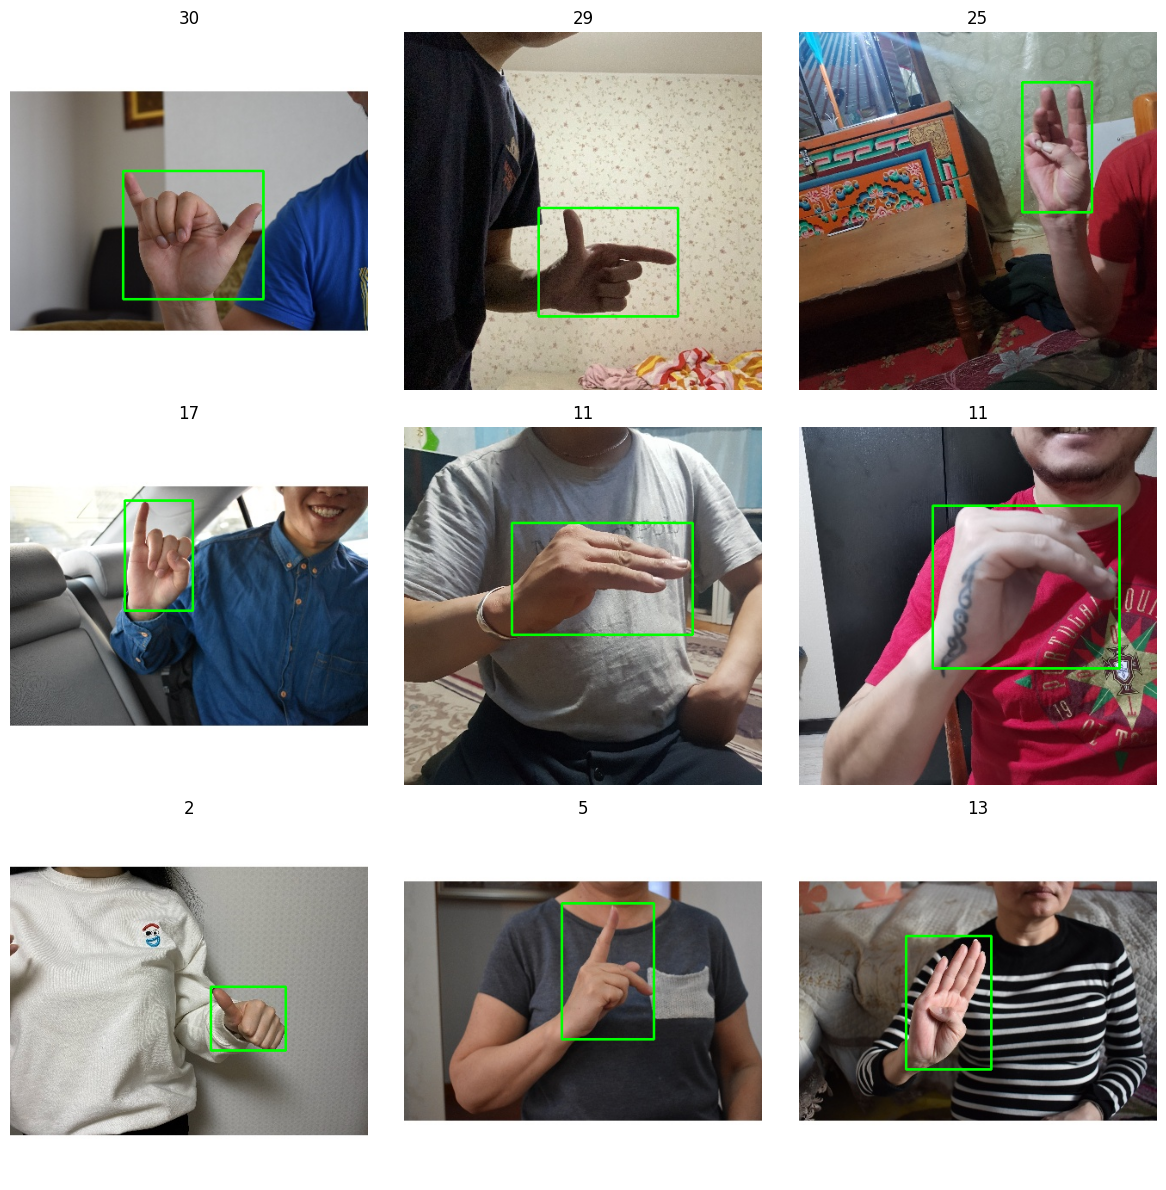

In [ ]:
def read_labels(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
        labels = [line.strip().split() for line in lines]
    return labels

def draw_boxes(image, labels):
    for label in labels:
        class_id = int(label[0])
        x, y, w, h = map(float, label[1:])
        image_height, image_width, _ = image.shape
        x1 = int((x - w / 2) * image_width)
        y1 = int((y - h / 2) * image_height)
        x2 = int((x + w / 2) * image_width)
        y2 = int((y + h / 2) * image_height)
        color = (0, 255, 0)  # Green
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    return image

data_dir = 'train'

image_files = [file for file in os.listdir(os.path.join(data_dir, 'images')) if file.endswith('.jpg')]

random.shuffle(image_files)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for ax, image_file in zip(axes.ravel(), image_files[:9]):
    image_path = os.path.join(data_dir, 'images', image_file)
    label_path = os.path.join(data_dir, 'labels', os.path.splitext(image_file)[0] + '.txt')

    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read labels
    labels = read_labels(label_path)

    # Draw bounding boxes on the image
    image_with_boxes = draw_boxes(image_rgb, labels)

    # Display image with bounding boxes and set the labels as titles
    ax.imshow(image_with_boxes)
    ax.set_title(str(labels[0][0]))
    ax.axis('off')

plt.tight_layout()
plt.show()

## Model

In [ ]:
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')
model = YOLO('yolov8n.yaml').load('yolov8n.pt')

Transferred 355/355 items from pretrained weights


In [ ]:
history = model.train(data='sign.yaml', epochs=100, imgsz=256,
                    patience = 100, batch = 128,
                    project ="ASL", optimizer = 'Adam', momentum = 0.9,
                    cos_lr=True ,seed = 42, plots = True , close_mosaic = 0, lr0 = 0.001)

New https://pypi.org/project/ultralytics/8.2.15 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.0  Python-3.10.6 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=sign.yaml, epochs=100, time=None, patience=50, batch=128, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=ASL, name=train8, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'g:\\Ayman\\Future things\\AI Projects\\ASL' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/aymansab0/asl/cd6557fcde7644c8b93040306a9fe3b1



TensorBoard: Start with 'tensorboard --logdir ASL\train8', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed 


train: Scanning G:\Ayman\Future things\AI Projects\ASL\train\labels.cache... 9955 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9955/9955 [00:00<?, ?it/s]
val: Scanning G:\Ayman\Future things\AI Projects\ASL\valid\labels.cache... 4247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4247/4247 [00:00<?, ?it/s]


Plotting labels to ASL\train8\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 256 train, 256 val
Using 8 dataloader workers
Logging results to ASL\train8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.65G      1.134      3.688      1.164        195        256: 100%|██████████| 78/78 [00:59<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.25s/it]

                   all       4247       4252     0.0361      0.717     0.0846     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.67G      1.041      2.432       1.12        178        256: 100%|██████████| 78/78 [00:50<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.21s/it]

                   all       4247       4252       0.33      0.424      0.319      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.63G     0.9895      1.953      1.109        176        256: 100%|██████████| 78/78 [00:29<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.23s/it]

                   all       4247       4252      0.525      0.618      0.617      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.62G       0.97      1.757      1.107        200        256: 100%|██████████| 78/78 [00:20<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.22s/it]

                   all       4247       4252       0.62      0.625      0.688      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.62G     0.9324      1.599      1.091        178        256: 100%|██████████| 78/78 [00:20<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.28s/it]

                   all       4247       4252       0.64      0.728      0.767      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.62G     0.9061      1.479      1.081        179        256: 100%|██████████| 78/78 [00:22<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.26s/it]

                   all       4247       4252      0.678      0.673      0.756       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.62G     0.8975      1.413      1.073        204        256: 100%|██████████| 78/78 [00:23<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:23<00:00,  1.39s/it]

                   all       4247       4252      0.691      0.717        0.8      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.62G     0.8671      1.328      1.058        165        256: 100%|██████████| 78/78 [00:48<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.25s/it]

                   all       4247       4252       0.79      0.797      0.866      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.62G      0.853       1.29      1.053        179        256: 100%|██████████| 78/78 [00:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.18s/it]

                   all       4247       4252      0.773      0.783      0.864      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.62G     0.8522      1.267      1.054        174        256: 100%|██████████| 78/78 [00:21<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.28s/it]

                   all       4247       4252      0.809      0.769      0.869      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.62G     0.8327       1.22      1.042        186        256: 100%|██████████| 78/78 [00:20<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]

                   all       4247       4252      0.812      0.815      0.893      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.62G     0.8262      1.169      1.037        164        256: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:22<00:00,  1.30s/it]

                   all       4247       4252      0.855      0.818       0.91      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.62G     0.8237      1.152      1.039        182        256: 100%|██████████| 78/78 [00:21<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:22<00:00,  1.31s/it]

                   all       4247       4252      0.837      0.838      0.913      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.62G     0.8075      1.129      1.029        203        256: 100%|██████████| 78/78 [00:21<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:25<00:00,  1.52s/it]

                   all       4247       4252      0.849       0.84       0.92      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.62G     0.8176      1.125      1.036        175        256: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.23s/it]

                   all       4247       4252      0.856      0.846      0.921      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.62G     0.8022      1.081      1.029        193        256: 100%|██████████| 78/78 [00:21<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.20s/it]

                   all       4247       4252      0.884      0.881      0.945      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.62G     0.7826      1.072      1.021        195        256: 100%|██████████| 78/78 [00:21<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:22<00:00,  1.31s/it]

                   all       4247       4252      0.861      0.848      0.927      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.62G     0.7921      1.055      1.025        169        256: 100%|██████████| 78/78 [00:19<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.15s/it]

                   all       4247       4252      0.886      0.874      0.945      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.62G     0.7822      1.035       1.02        181        256: 100%|██████████| 78/78 [00:20<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.25s/it]

                   all       4247       4252      0.878      0.878      0.944       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.62G     0.7759      1.031       1.02        175        256: 100%|██████████| 78/78 [00:20<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]

                   all       4247       4252      0.874      0.832      0.921      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.62G     0.7695      1.012      1.018        169        256: 100%|██████████| 78/78 [00:20<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.20s/it]

                   all       4247       4252       0.88      0.863      0.937      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.62G      0.769     0.9944      1.013        186        256: 100%|██████████| 78/78 [00:20<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.18s/it]

                   all       4247       4252      0.895      0.882       0.95       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.62G     0.7551      0.973      1.009        197        256: 100%|██████████| 78/78 [00:20<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]

                   all       4247       4252      0.893       0.87      0.943      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.62G     0.7601      0.979      1.011        178        256: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.23s/it]

                   all       4247       4252      0.906      0.887      0.957      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.62G     0.7589     0.9733      1.013        183        256: 100%|██████████| 78/78 [00:21<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.24s/it]

                   all       4247       4252       0.91      0.894      0.959      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.62G     0.7524     0.9493      1.006        178        256: 100%|██████████| 78/78 [00:20<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.25s/it]

                   all       4247       4252      0.907      0.889      0.954      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.62G     0.7525     0.9421      1.006        207        256: 100%|██████████| 78/78 [00:20<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.20s/it]

                   all       4247       4252      0.888      0.877      0.948      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.62G     0.7428     0.9411      1.008        177        256: 100%|██████████| 78/78 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.24s/it]

                   all       4247       4252      0.897      0.898      0.956      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.62G     0.7428     0.9256      1.002        184        256: 100%|██████████| 78/78 [00:20<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]

                   all       4247       4252      0.913      0.898      0.956      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.62G     0.7438     0.9317      1.004        189        256: 100%|██████████| 78/78 [00:20<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.21s/it]

                   all       4247       4252      0.916      0.902      0.962      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.62G     0.7395     0.9206      1.003        189        256: 100%|██████████| 78/78 [00:20<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.18s/it]

                   all       4247       4252      0.901      0.899      0.957      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.62G     0.7374     0.9132      1.002        164        256: 100%|██████████| 78/78 [00:21<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.24s/it]

                   all       4247       4252      0.911      0.906      0.958      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.62G     0.7373     0.9092      1.003        203        256: 100%|██████████| 78/78 [00:19<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.16s/it]

                   all       4247       4252      0.913        0.9      0.961      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.62G     0.7283     0.8884     0.9985        203        256: 100%|██████████| 78/78 [00:19<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.15s/it]

                   all       4247       4252      0.892      0.896      0.953      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.62G     0.7243     0.8845      0.997        185        256: 100%|██████████| 78/78 [00:19<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.16s/it]

                   all       4247       4252      0.932      0.906      0.965      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.62G     0.7243     0.8824      0.995        186        256: 100%|██████████| 78/78 [00:19<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.20s/it]

                   all       4247       4252       0.93      0.921      0.971      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.62G     0.7203     0.8748     0.9975        185        256: 100%|██████████| 78/78 [00:21<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.26s/it]

                   all       4247       4252      0.924      0.915      0.966      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.62G     0.7124     0.8591     0.9918        171        256: 100%|██████████| 78/78 [00:20<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.20s/it]

                   all       4247       4252      0.917      0.924       0.97      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.62G     0.7111     0.8516     0.9951        179        256: 100%|██████████| 78/78 [00:20<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.22s/it]

                   all       4247       4252      0.938      0.912       0.97      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.62G     0.7205     0.8553     0.9941        172        256: 100%|██████████| 78/78 [00:20<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.20s/it]

                   all       4247       4252      0.937      0.919      0.971      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.62G     0.7113     0.8504     0.9927        192        256: 100%|██████████| 78/78 [00:20<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.21s/it]

                   all       4247       4252      0.922      0.903      0.963       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.62G     0.7044     0.8342     0.9892        186        256: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.27s/it]

                   all       4247       4252      0.931      0.924      0.971      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.62G     0.6996     0.8395     0.9862        181        256: 100%|██████████| 78/78 [00:20<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]

                   all       4247       4252      0.938      0.915      0.971      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.62G     0.7011     0.8186     0.9901        172        256: 100%|██████████| 78/78 [00:20<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.18s/it]

                   all       4247       4252      0.934      0.923      0.973      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.62G      0.696      0.809     0.9859        186        256: 100%|██████████| 78/78 [00:20<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.20s/it]

                   all       4247       4252      0.933      0.925      0.972        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.62G     0.6952     0.8139     0.9862        185        256: 100%|██████████| 78/78 [00:20<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]

                   all       4247       4252      0.938       0.93      0.974      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.62G     0.6972      0.808     0.9891        163        256: 100%|██████████| 78/78 [00:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.28s/it]

                   all       4247       4252      0.938      0.925      0.972      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.62G     0.6928     0.7977     0.9834        174        256: 100%|██████████| 78/78 [00:19<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]

                   all       4247       4252      0.937      0.922      0.972      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.62G     0.6881     0.7941     0.9827        197        256: 100%|██████████| 78/78 [00:20<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.17s/it]

                   all       4247       4252      0.938      0.935      0.975      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.62G     0.6872      0.797     0.9832        180        256: 100%|██████████| 78/78 [00:20<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.29s/it]

                   all       4247       4252      0.942      0.923      0.974      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.62G     0.6844     0.7845     0.9817        178        256: 100%|██████████| 78/78 [00:21<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.22s/it]

                   all       4247       4252      0.938      0.934      0.974      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.62G     0.6796     0.7855     0.9815        201        256: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.23s/it]

                   all       4247       4252      0.933      0.929      0.973      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.62G     0.6822     0.7747     0.9822        167        256: 100%|██████████| 78/78 [00:21<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.25s/it]

                   all       4247       4252      0.925      0.937      0.975      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.62G     0.6709     0.7584     0.9752        197        256: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.23s/it]

                   all       4247       4252      0.942      0.934      0.975      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.62G     0.6749     0.7584     0.9771        179        256: 100%|██████████| 78/78 [00:21<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:22<00:00,  1.30s/it]

                   all       4247       4252      0.942      0.942      0.978      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.62G     0.6719     0.7561     0.9753        183        256: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.27s/it]

                   all       4247       4252      0.947      0.942      0.979      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.62G     0.6691     0.7485     0.9772        162        256: 100%|██████████| 78/78 [00:20<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.23s/it]

                   all       4247       4252      0.941      0.938      0.976      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.62G     0.6707     0.7507     0.9755        183        256: 100%|██████████| 78/78 [00:21<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.24s/it]

                   all       4247       4252      0.949      0.943      0.977      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.62G     0.6663     0.7432     0.9775        196        256: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.28s/it]

                   all       4247       4252      0.944       0.94       0.98      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.62G     0.6605     0.7396     0.9753        196        256: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.22s/it]

                   all       4247       4252      0.954      0.933      0.977       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.62G      0.653     0.7257     0.9697        202        256: 100%|██████████| 78/78 [00:21<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.25s/it]

                   all       4247       4252      0.942      0.941      0.977      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.62G      0.655     0.7281     0.9721        199        256: 100%|██████████| 78/78 [00:21<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.27s/it]

                   all       4247       4252      0.949      0.945      0.979      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.62G     0.6488     0.7145     0.9687        186        256: 100%|██████████| 78/78 [00:19<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.20s/it]

                   all       4247       4252      0.949      0.948      0.981      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.62G     0.6462     0.7009     0.9664        161        256: 100%|██████████| 78/78 [00:21<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]

                   all       4247       4252      0.948      0.949       0.98      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.62G     0.6547      0.716     0.9709        197        256: 100%|██████████| 78/78 [00:20<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.17s/it]

                   all       4247       4252      0.939      0.949      0.979      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.62G     0.6473     0.7042     0.9677        197        256: 100%|██████████| 78/78 [00:20<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]

                   all       4247       4252      0.948      0.945       0.98      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.62G     0.6396     0.6965     0.9644        196        256: 100%|██████████| 78/78 [00:20<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.21s/it]

                   all       4247       4252      0.957      0.943      0.981      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.62G     0.6395     0.6941     0.9653        185        256: 100%|██████████| 78/78 [00:19<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.19s/it]

                   all       4247       4252      0.957      0.948      0.981      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.62G     0.6366     0.6801     0.9622        170        256: 100%|██████████| 78/78 [00:21<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:21<00:00,  1.24s/it]

                   all       4247       4252      0.955      0.947      0.981      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.62G     0.6357     0.6873     0.9636        200        256: 100%|██████████| 78/78 [00:20<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.21s/it]

                   all       4247       4252       0.95      0.947      0.979      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.62G     0.6285     0.6797     0.9617        192        256: 100%|██████████| 78/78 [00:21<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:20<00:00,  1.20s/it]

                   all       4247       4252      0.953      0.946      0.979      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.62G     0.6271     0.6681     0.9591        206        256: 100%|██████████| 78/78 [00:18<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]

                   all       4247       4252       0.95      0.949       0.98      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.62G     0.6291     0.6692     0.9626        174        256: 100%|██████████| 78/78 [00:18<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.13s/it]

                   all       4247       4252      0.956      0.947       0.98      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.62G     0.6297     0.6583     0.9607        190        256: 100%|██████████| 78/78 [00:19<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.15s/it]

                   all       4247       4252      0.955      0.943      0.979       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.62G     0.6245     0.6532     0.9608        206        256: 100%|██████████| 78/78 [00:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]

                   all       4247       4252      0.954      0.947      0.981      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.62G     0.6194     0.6475     0.9585        172        256: 100%|██████████| 78/78 [00:19<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]

                   all       4247       4252      0.955      0.947       0.98      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.62G      0.617     0.6409     0.9575        221        256: 100%|██████████| 78/78 [00:18<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.15s/it]

                   all       4247       4252      0.954      0.946      0.982      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.62G     0.6127     0.6468     0.9558        194        256: 100%|██████████| 78/78 [00:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:23<00:00,  1.38s/it]

                   all       4247       4252      0.957      0.944      0.981      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.62G     0.6189     0.6468      0.955        186        256: 100%|██████████| 78/78 [00:20<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]

                   all       4247       4252      0.953      0.952      0.982      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.62G      0.614     0.6328     0.9561        176        256: 100%|██████████| 78/78 [00:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]

                   all       4247       4252      0.949      0.953      0.981      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.62G      0.613      0.635     0.9558        190        256: 100%|██████████| 78/78 [00:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:18<00:00,  1.12s/it]

                   all       4247       4252      0.955      0.947      0.982      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.62G      0.612     0.6382      0.956        181        256: 100%|██████████| 78/78 [00:19<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.12s/it]

                   all       4247       4252      0.955      0.948      0.982      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.62G     0.6019     0.6202     0.9502        189        256: 100%|██████████| 78/78 [00:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]

                   all       4247       4252      0.952       0.95      0.982      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.62G      0.608      0.628     0.9555        203        256: 100%|██████████| 78/78 [00:18<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:18<00:00,  1.10s/it]

                   all       4247       4252      0.959      0.944      0.982      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.62G     0.6084      0.618     0.9535        184        256: 100%|██████████| 78/78 [00:19<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:18<00:00,  1.11s/it]

                   all       4247       4252      0.955      0.948      0.981      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.62G     0.6006     0.6225     0.9522        176        256: 100%|██████████| 78/78 [00:18<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.13s/it]

                   all       4247       4252      0.961      0.946      0.982      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.62G     0.6075     0.6151     0.9527        193        256: 100%|██████████| 78/78 [00:18<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]

                   all       4247       4252      0.962      0.946      0.982      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.62G     0.5988     0.6157     0.9501        200        256: 100%|██████████| 78/78 [00:19<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.15s/it]

                   all       4247       4252      0.956       0.95      0.983      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.62G     0.6018     0.6117     0.9519        189        256: 100%|██████████| 78/78 [00:19<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:18<00:00,  1.11s/it]

                   all       4247       4252      0.958      0.945      0.982      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.62G     0.5976     0.6101     0.9516        182        256: 100%|██████████| 78/78 [00:18<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]

                   all       4247       4252      0.959      0.946      0.982      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.62G     0.5937     0.6038     0.9485        190        256: 100%|██████████| 78/78 [00:18<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.12s/it]

                   all       4247       4252      0.957      0.948      0.982      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.62G     0.5954      0.609     0.9501        192        256: 100%|██████████| 78/78 [00:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.13s/it]

                   all       4247       4252      0.953      0.951      0.981      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.62G     0.5984     0.6046     0.9499        208        256: 100%|██████████| 78/78 [00:19<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:18<00:00,  1.12s/it]

                   all       4247       4252      0.956      0.948      0.982      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.62G     0.5937     0.6069     0.9478        167        256: 100%|██████████| 78/78 [00:18<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.13s/it]

                   all       4247       4252      0.962      0.944      0.982      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.62G     0.5936      0.604     0.9483        189        256: 100%|██████████| 78/78 [00:18<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]

                   all       4247       4252      0.963      0.944      0.982      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.62G     0.5922     0.5963     0.9493        183        256: 100%|██████████| 78/78 [00:19<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]

                   all       4247       4252      0.962      0.945      0.982      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.62G     0.5975     0.6043     0.9507        204        256: 100%|██████████| 78/78 [00:19<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.12s/it]

                   all       4247       4252      0.962      0.945      0.982      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.62G     0.5879     0.5961     0.9496        194        256: 100%|██████████| 78/78 [00:18<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.13s/it]

                   all       4247       4252      0.962      0.944      0.982      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.62G     0.5936     0.6049     0.9488        174        256: 100%|██████████| 78/78 [00:19<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.12s/it]

                   all       4247       4252      0.963      0.944      0.982      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.62G     0.5887     0.5932     0.9448        199        256: 100%|██████████| 78/78 [00:18<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.13s/it]

                   all       4247       4252      0.963      0.944      0.982      0.817



100 epochs completed in 1.180 hours.
Optimizer stripped from ASL\train8\weights\last.pt, 6.2MB
Optimizer stripped from ASL\train8\weights\best.pt, 6.2MB

Validating ASL\train8\weights\best.pt...
Ultralytics YOLOv8.2.0  Python-3.10.6 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
YOLOv8n summary (fused): 168 layers, 3011888 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:23<00:00,  1.40s/it]


                   all       4247       4252      0.961      0.946      0.982      0.819
                   ain       4247        133      0.992       0.97      0.994      0.835
                    al       4247        136      0.985       0.96      0.992      0.912
                 aleff       4247        136      0.994      0.963      0.994      0.888
                    bb       4247        137      0.983      0.985      0.994      0.892
                   dal       4247        111      0.969      0.852      0.966      0.789
                   dha       4247        135      0.977      0.942      0.978      0.828
                  dhad       4247        130      0.957      0.969       0.98       0.83
                    fa       4247        135      0.885      0.874      0.927      0.762
                  gaaf       4247        134      0.907      0.791      0.937      0.775
                 ghain       4247        135          1      0.985      0.995       0.85
                    h

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : administrative_cat_1098
COMET INFO:     url                   : https://www.comet.com/aymansab0/asl/cd6557fcde7644c8b93040306a9fe3b1
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [201]               : (1.024425261896289e-05, 0.06742307692307692)
COMET INFO:     lr/pg1 [201]               : (1.024425261896289e-05, 0.0009978031724785245)
COMET INFO:     lr/pg2 [201]               : (1.024425261896289e-05, 0.0009978031724785245)
COMET INFO:     metrics/mAP50(B) [202]     : (0.08456, 0.98279)
COMET INFO:     metrics/mAP50-95(B) [202]  : (0.05952, 0.8188667862279768)
COMET INFO:     metrics/precision(B) [202] : (0.03605, 0.96328)
COMET 

## Loading Model (Previously Trained Model Saved)

In [ ]:
# loading Model
trained_model = YOLO('ASL.pt')

## Predictions

In [ ]:
test_images_dir = 'valid/images'
test_images = [os.path.join(test_images_dir, image) for image in os.listdir(test_images_dir)]

test_samples = np.random.choice(test_images, 10, replace=False)

print(test_samples)

['G:\\Ayman\\Future things\\AI Projects\\ASL\\valid\\images\\1058_69_M_ghain_5.jpg' 'G:\\Ayman\\Future things\\AI Projects\\ASL\\valid\\images\\1035_18_F_la_1.jpg' 'G:\\Ayman\\Future things\\AI Projects\\ASL\\valid\\images\\1058_69_M_meem_4.jpg'
 'G:\\Ayman\\Future things\\AI Projects\\ASL\\valid\\images\\831_23_M_ghain_2.jpg' 'G:\\Ayman\\Future things\\AI Projects\\ASL\\valid\\images\\14_19_F_dal_3.jpg' 'G:\\Ayman\\Future things\\AI Projects\\ASL\\valid\\images\\1058_69_M_ghain_4.jpg'
 'G:\\Ayman\\Future things\\AI Projects\\ASL\\valid\\images\\3_55_F_saad_3.jpg' 'G:\\Ayman\\Future things\\AI Projects\\ASL\\valid\\images\\1034_19_M_toot_8.jpg' 'G:\\Ayman\\Future things\\AI Projects\\ASL\\valid\\images\\1003_19_F_fa_5.jpg'
 'G:\\Ayman\\Future things\\AI Projects\\ASL\\valid\\images\\1017_35_M_seen_1.jpg']


In [ ]:
results = trained_model([test_samples[0], test_samples[1], test_samples[2], test_samples[3], test_samples[4], test_samples[5], test_samples[6], test_samples[7], test_samples[8], test_samples[9]])

results_dir = "results_tries"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    
i = 0
for result in results:
    boxes = result.boxes  
    masks = result.masks  
    keypoints = result.keypoints  
    probs = result.probs 
    
    # Save image
    filename = os.path.join(results_dir, f"result_{i}.jpg")
    result.save(filename=filename)
    # result.show() # Uncomment to display image
    i+=1
    


0: 256x256 1 ghain, 22.4ms
1: 256x256 1 la, 22.4ms
2: 256x256 1 meem, 22.4ms
3: 256x256 1 ghain, 22.4ms
4: 256x256 1 dal, 22.4ms
5: 256x256 1 ghain, 22.4ms
6: 256x256 1 saad, 22.4ms
7: 256x256 1 toot, 22.4ms
8: 256x256 1 fa, 22.4ms
9: 256x256 1 seen, 22.4ms
Speed: 1.2ms preprocess, 22.4ms inference, 3.4ms postprocess per image at shape (1, 3, 256, 256)


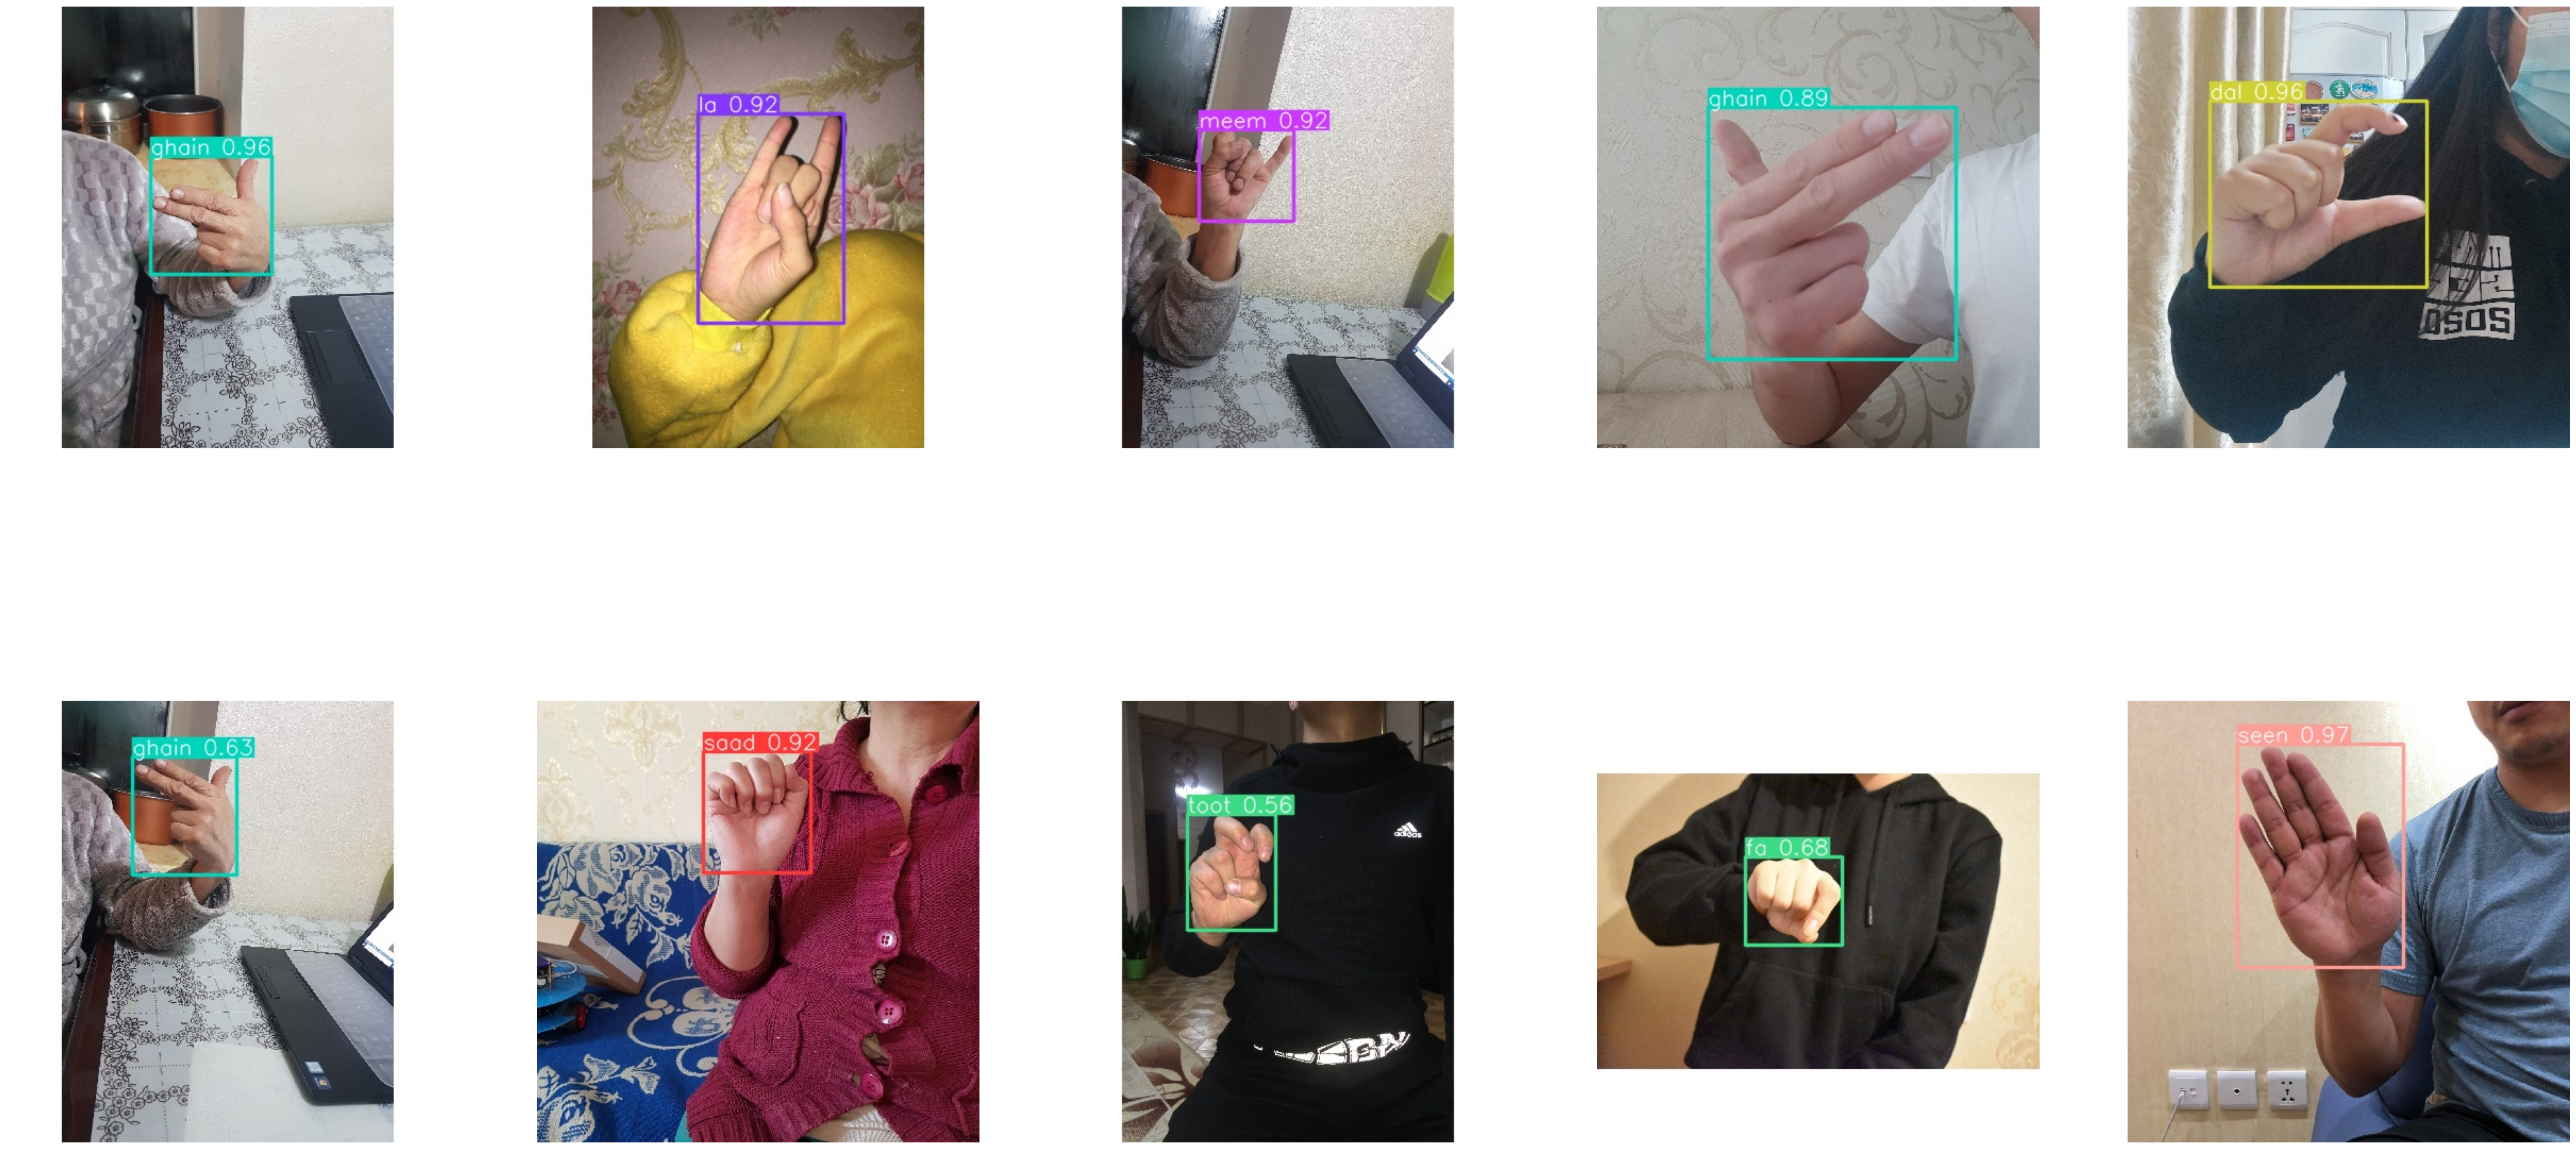

In [ ]:
directory = "results_tries"

images = []
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        img = plt.imread(os.path.join(directory, filename))
        images.append(img)

fig, axs = plt.subplots(2, 5, figsize=(50, 25))
for i in range(10):
    axs[i//5, i%5].imshow(images[i])
    axs[i//5, i%5].axis('off')

plt.show()